In [16]:
import pandas
import matplotlib as mpl
import xarray as xr
import numpy as np
import datetime as dt
import os.path
dir_data='F:/data/model_data/CMEM/global-reanalysis-phy-001-030-monthly/'
dir_data_clim='F:/data/model_data/CMEM/global-reanalysis-phy-001-030-monthly/clim/'
def sss_filename(d):
    dir_data='F:/data/model_data/CMEM/global-reanalysis-phy-001-030-monthly/'
    syr, smon, sdym =str(d.year).zfill(4), str(d.month).zfill(2), str(d.day).zfill(2)
    fname_tem=syr + '/'+ 'mercatorglorys12v1_gl12_mean_' + syr + smon + '.nc'
    filename = dir_data + fname_tem
    return filename
def sss_filename_new(d):
    dir_data='F:/data/model_data/CMEM/global-reanalysis-phy-001-030-monthly/'
    syr, smon, sdym =str(d.year).zfill(4), str(d.month).zfill(2), str(d.day).zfill(2)
    fname_tem=syr + '/'+ 'subset_mercatorglorys12v1_gl12_mean_' + syr + smon + '.nc'
    filename = dir_data + fname_tem
    return filename
def sss_filename_new_yearly(d):
    dir_data='F:/data/model_data/CMEM/global-reanalysis-phy-001-030-monthly/'
    syr, smon, sdym =str(d.year).zfill(4), str(d.month).zfill(2), str(d.day).zfill(2)
    fname_tem=syr + '/'+ 'year_subset_mercatorglorys12v1_gl12_mean_' + syr + '.nc'
    filename = dir_data + fname_tem
    return filename

def sss_nrt_filename(d):
    dir_data='F:/data/model_data/CMEM/global-analysis-forecast-phys_001_015/'
    syr, smon, sdym =str(d.year).zfill(4), str(d.month).zfill(2), str(d.day).zfill(2)
    d2 = d + dt.timedelta(days = +2)
    syr2, smon2, sdym2 =str(d2.year).zfill(4), str(d2.month).zfill(2), str(d2.day).zfill(2)
    fname_tem = 'metoffice_coupled_orca025_GL4_SAL_b' + syr2 + smon2 + sdym2 + '_dm' + syr + smon + sdym + '.nc'
    filename = dir_data + fname_tem
    return filename
def ssh_nrt_filename(d):
    dir_data='F:/data/model_data/CMEM/global-analysis-forecast-phys_001_015/'
    syr, smon, sdym =str(d.year).zfill(4), str(d.month).zfill(2), str(d.day).zfill(2)
    d2 = d + dt.timedelta(days = +2)
    syr2, smon2, sdym2 =str(d2.year).zfill(4), str(d2.month).zfill(2), str(d2.day).zfill(2)
    fname_tem = 'metoffice_coupled_orca025_GL4_SSH_b' + syr2 + smon2 + sdym2 + '_dm' + syr + smon + sdym + '.nc'
    filename = dir_data + fname_tem
    return filename
def sss_nrt_filename_new(d):
    dir_data='F:/data/model_data/CMEM/global-analysis-forecast-phys_001_015/'
    syr, smon, sdym =str(d.year).zfill(4), str(d.month).zfill(2), str(d.day).zfill(2)
    fname_tem = 'monthly/monthly_subset_metoffice_coupled_orca025_GL4_SAL_b' + syr + smon + '_dm20180208.nc'
    filename = dir_data + fname_tem
    return filename
def sss_nrt_filename_new_yearly(d):
    dir_data='F:/data/model_data/CMEM/global-analysis-forecast-phys_001_015/'
    syr, smon, sdym =str(d.year).zfill(4), str(d.month).zfill(2), str(d.day).zfill(2)
    fname_tem = 'monthly/year_subset_metoffice_coupled_orca025_GL4_SAL_b' + syr + '_dm20180208.nc'
    filename = dir_data + fname_tem
    return filename

#get 0.25 km grid from cmc data to downsamplt this
filename = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/CMC/CMC0.2deg/v2/1994/002/19940102120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
ds_v2 = xr.open_dataset(filename)
new_lat = np.linspace(ds_v2.lat[0], ds_v2.lat[-1], ds_v2.dims['lat'])
new_lon = np.linspace(ds_v2.lon[0], ds_v2.lon[-1], ds_v2.dims['lon'])
ds_v2.close()

In [ ]:
#MONTHLY files are huge becauseo of depth layers, so lower spatial resolution and only save surface data
for lyr in range(1999,2018): #2017):
    for imon in range(1,13): #3,13):
        d = dt.date(lyr,imon,1) 
        filename = sss_filename(d)
        if os.path.exists(filename):      
            ds = xr.open_dataset(filename)
            ds_subset = ds.sel(depth = ds.depth[0].data)
            ds_low_res = ds_subset.interp(latitude = new_lat,longitude = new_lon)
            ds.close()
            filename_new = sss_filename_new(d)
            ds_low_res.to_netcdf(filename_new)
            os.remove(filename)

In [121]:
lyr, idyjl = 2018, 1
d = dt.date(lyr,1,1) + dt.timedelta(idyjl - 1)
filename = sss_nrt_filename(d)
print(filename)
ds = xr.open_dataset(filename)
ds.close()
ds = ds.mean('depth')
ds
filename = ssh_nrt_filename(d)
print(filename)
ds2 = xr.open_dataset(filename)
ds2.close()
ds2
ds['zos']=ds2['zos']
ds

F:/data/model_data/CMEM/global-analysis-forecast-phys_001_015/metoffice_coupled_orca025_GL4_SAL_b20180103_dm20180101.nc
F:/data/model_data/CMEM/global-analysis-forecast-phys_001_015/metoffice_coupled_orca025_GL4_SSH_b20180103_dm20180101.nc


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 692, lon: 1440, time: 1)
Coordinates:
  * time     (time) object 2018-01-01 12:00:00
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 -83.0 -82.75 -82.5 -82.25 ... 89.0 89.25 89.5 89.75
Data variables:
    so       (time, lat, lon) float32 nan nan nan ... 34.059727 34.059727
    zos      (time, lat, lon) float32 ...

In [225]:
#Daily NRT files are huge becauseo of depth layers, so lower spatial resolution and only save surface data
#also put into monthly file          
file1 = 'F:/data/model_data/CMEM/global-reanalysis-phy-001-030-monthly/2017/year_subset_mercatorglorys12v1_gl12_mean_2017.nc'
ds1 = xr.open_dataset(file1)
ds1.close()
for lyr in range(2018,2019): 
    ds_mnth=[]
    for imon in range(1,13): #:13):
        init = 0
        for idyjl in range(1,366):
            d = dt.date(lyr,1,1) + dt.timedelta(idyjl - 1)
            dd=dt.datetime(lyr,1,1) + dt.timedelta(idyjl - 1)
            if d.month!=imon:
                continue
            filename = sss_nrt_filename(d)
            ds = xr.open_dataset(filename)
            ds = ds.drop('time').mean('time')
            ds = ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180)).sortby('lon').sortby('lat')
            #ds['time']=dd
            ds.assign_coords(time=dd)
            ds.expand_dims('time')
            ds_subset = ds.sel(depth = ds.depth[0].data)
            ds.close()
            filename = ssh_nrt_filename(d)
            ds_tem = xr.open_dataset(filename)
            ds_tem = ds_tem.drop('time').mean('time')
            ds_tem = ds_tem.assign_coords(lon=(((ds_tem.lon + 180) % 360) - 180)).sortby('lon').sortby('lat')
            #ds_tem['time']=dd
            ds_tem.assign_coords(time=dd)
            ds_tem.expand_dims('time')
            ds_subset['zos']=ds_tem['zos']
            ds_tem.close()
            ds_low_res = ds_subset.interp(lat = new_lat,lon = new_lon)
            print(ds_low_res)
            if init==0:
                ds_sum = ds_low_res
                init = 1
            else:
                ds_sum = xr.concat([ds_sum,ds_low_res],dim = 'time')
            print(idyjl,ds_sum.dims)
        #ds_clim2 = ds_sum.resample(time='M').mean()   
        ds_clim2 = ds_sum.mean('time')
        #ds_clim2.assign_coords(time=dd.month)
        ds_clim2.expand_dims('time',0)
        dd=dt.datetime(lyr,imon,1)
        ds_clim2.coords['time']=ds1.time[imon-1].values+np.timedelta64(days=365)
#        ds_clim2 = ds_sum.groupby('time.month').mean('time')
        #ds_sum = ds_sum.mean('time',skipna=True)
        ds_mnth.append(ds_clim2)
    combined = xr.concat(ds_mnth, dim='time')
    filename_new = sss_nrt_filename_new_yearly(d)
    combined.to_netcdf(filename_new)
    

C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
1 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
2 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
3 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
4 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
5 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
6 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
7 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
8 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
9 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
10 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
11 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
12 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
13 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
14 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
15 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
16 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
17 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
18 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
19 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
20 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
21 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
22 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
23 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
24 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
25 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
26 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
27 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
28 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
29 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 29}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
30 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 30}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
31 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 31}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
32 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
33 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
34 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
35 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
36 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
37 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
38 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
39 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
40 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
41 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
42 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
43 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
44 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
45 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
46 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
47 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
48 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
49 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
50 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
51 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
52 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
53 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
54 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
55 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
56 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
57 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
58 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
59 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
60 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
61 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
62 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
63 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
64 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
65 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
66 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
67 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
68 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
69 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
70 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
71 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
72 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
73 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
74 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
75 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
76 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
77 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
78 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
79 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
80 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
81 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
82 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
83 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
84 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
85 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
86 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
87 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
88 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 29}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
89 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 30}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
90 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 31}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
91 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
92 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
93 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
94 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
95 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
96 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
97 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
98 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
99 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
100 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
101 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
102 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
103 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
104 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
105 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
106 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
107 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
108 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
109 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
110 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
111 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
112 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
113 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
114 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
115 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
116 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
117 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
118 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
119 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 29}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
120 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 30}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
121 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
122 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
123 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
124 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
125 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
126 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
127 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
128 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
129 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
130 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
131 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
132 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
133 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
134 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
135 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
136 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
137 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
138 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
139 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
140 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
141 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
142 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
143 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
144 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
145 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
146 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
147 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
148 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
149 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 29}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
150 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 30}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
151 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 31}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
152 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
153 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
154 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
155 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
156 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
157 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
158 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
159 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
160 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
161 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
162 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
163 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
164 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
165 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
166 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
167 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
168 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
169 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
170 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
171 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
172 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
173 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
174 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
175 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
176 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
177 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
178 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
179 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
180 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 29}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
181 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 30}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
182 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
183 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
184 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
185 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
186 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
187 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
188 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
189 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
190 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
191 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
192 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
193 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
194 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
195 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
196 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
197 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
198 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
199 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
200 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
201 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
202 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
203 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
204 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
205 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
206 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
207 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
208 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
209 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
210 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 29}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
211 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 30}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
212 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 31}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
213 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
214 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
215 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
216 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
217 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
218 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
219 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
220 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
221 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
222 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
223 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
224 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
225 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
226 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
227 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
228 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
229 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
230 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
231 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
232 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
233 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
234 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
235 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
236 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
237 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
238 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
239 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
240 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
241 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 29}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
242 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 30}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
243 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 31}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
244 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
245 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
246 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
247 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
248 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
249 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
250 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
251 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
252 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
253 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
254 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
255 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
256 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
257 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
258 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
259 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
260 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
261 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
262 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
263 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
264 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
265 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
266 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
267 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
268 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
269 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
270 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
271 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
272 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 29}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
273 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 30}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
274 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
275 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
276 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
277 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
278 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
279 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
280 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
281 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
282 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
283 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
284 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
285 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
286 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
287 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
288 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
289 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
290 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
291 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
292 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
293 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
294 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
295 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
296 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
297 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
298 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
299 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
300 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
301 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
302 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 29}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
303 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 30}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
304 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 31}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
305 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
306 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
307 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
308 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
309 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
310 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
311 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
312 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
313 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
314 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
315 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
316 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
317 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
318 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
319 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
320 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
321 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
322 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
323 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
324 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
325 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
326 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
327 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
328 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
329 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
330 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
331 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
332 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
333 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 29}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
334 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 30}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
335 Frozen(SortedKeysDict(OrderedDict([('lat', 901), ('lon', 1800)])))
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
336 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 2}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
337 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 3}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
338 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 4}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
339 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 5}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
340 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 6}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
341 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 7}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
342 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 8}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
343 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 9}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
344 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 10}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
345 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 11}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
346 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 12}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
347 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 13}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
348 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 14}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
349 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 15}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
350 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 16}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
351 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 17}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
352 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 18}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
353 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 19}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
354 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 20}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
355 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 21}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
356 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 22}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
357 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 23}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
358 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 24}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
359 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 25}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
360 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 26}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
361 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 27}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
362 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 28}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
363 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 29}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
364 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 30}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
Data variables:
    so       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
365 Frozen(SortedKeysDict({'lat': 901, 'lon': 1800, 'time': 31}))


C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [224]:
file1 = 'F:/data/model_data/CMEM/global-reanalysis-phy-001-030-monthly/2017/year_subset_mercatorglorys12v1_gl12_mean_2017.nc'
ds1 = xr.open_dataset(file1)
ds1.close()
print(ds1.time[0])
print(ds1.time[0].values+np.timedelta64(days=365))

<xarray.DataArray 'time' ()>
array('2017-01-16T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    depth    float32 ...
    time     datetime64[ns] 2017-01-16T12:00:00
Attributes:
    axis:           T
    long_name:      Time (hours since 1950-01-01)
    standard_name:  time
2017-01-16T12:00:00.000000000


F:/data/model_data/CMEM/global-analysis-forecast-phys_001_015/monthly/year_subset_metoffice_coupled_orca025_GL4_SAL_b2018_dm20180208.nc
<xarray.Dataset>
Dimensions:  (lat: 901, lon: 1800, time: 12)
Coordinates:
    depth    float32 0.0
  * lat      (lat) float64 -90.0 -89.8 -89.6 -89.4 -89.2 ... 89.4 89.6 89.8 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.6 -179.4 ... 179.4 179.6 179.8
  * time     (time) datetime64[ns] 1993-01-16T12:00:00 ... 1993-12-16T12:00:00
Data variables:
    so       (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    zos      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan


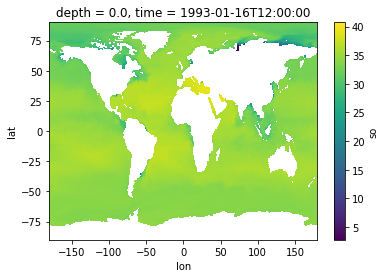

In [192]:
print(filename_new)
print(combined)
combined.so[0,:,:].plot()

In [ ]:
#make monthly average ssts into one yearly file
for lyr in range(2017,2018): #2017):
    ds_mnth=[]
    for imon in range(1,13):
        d = dt.date(lyr,imon,1) 
        filename = sss_filename_new(d)
        filename_new = sss_filename_new_yearly(d)
        ds = xr.open_dataset(filename)
        ds.close()
        ds_mnth.append(ds)
    combined = xr.concat(ds_mnth, dim='time')
    combined = combined.rename({'longitude':'lon','latitude':'lat'})
    combined.to_netcdf(filename_new)
    

In [217]:
#test nrt and reanalysis yearly files
file1 = 'F:/data/model_data/CMEM/global-reanalysis-phy-001-030-monthly/1993/year_subset_mercatorglorys12v1_gl12_mean_1993.nc'
file2 = 'F:/data/model_data/CMEM/global-analysis-forecast-phys_001_015/monthly/year_subset_metoffice_coupled_orca025_GL4_SAL_b2018_dm20180208.nc'
ds1 = xr.open_dataset(file1)
ds2 = xr.open_dataset(file2)
#print(ds1)
#print(ds2)
#print(dt.timedelta(days=25))
#print(ds1.time[0]+dt.timedelta(days=25))
d=ds1['time'].values
d[0].time

AttributeError: 'numpy.datetime64' object has no attribute 'time'

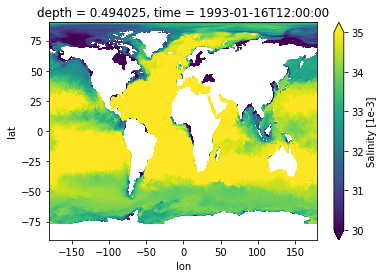

In [184]:
ds1.so[0,:,:].plot(vmin=30,vmax=35)


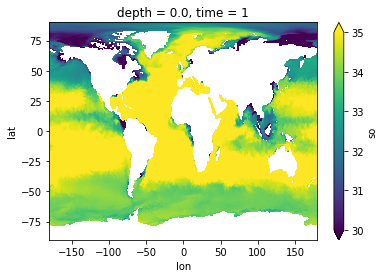

In [185]:
ds2.so[0,:,:].plot(vmin=30,vmax=35)


In [ ]:
init = 0
for lyr in range(1993,1999): #2018): 
    d = dt.date(lyr,1,1) 
    filename = sss_filename_new_yearly(d)
    ds = xr.open_dataset(filename)
#    ds = xr.open_dataset(filename,drop_variables = ['usi','vsi','mlotst','zos','bottomT','sithick','siconc','thetao','uo','vo'])
    if init==0:
        ds_sum = ds
        init = 1
    else:
        ds_sum = xr.concat([ds_sum,ds],dim = 'time')
    ds.close()
    print(lyr,ds_sum.dims)
ds_sum2 = ds_sum.groupby('time.month').mean('time')
fname_tem='climatology_monthly_1993_1998_mercatorglorys12v1_gl12_mean.nc'
filename_out = dir_data_clim + fname_tem
ds_sum2.to_netcdf(filename_out)


In [ ]:
init = 0
for lyr in range(1999,2005): #2018): 
    d = dt.date(lyr,1,1) 
    filename = sss_filename_new_yearly(d)
    ds = xr.open_dataset(filename)
#    ds = xr.open_dataset(filename,drop_variables = ['usi','vsi','mlotst','zos','bottomT','sithick','siconc','thetao','uo','vo'])
    if init==0:
        ds_sum = ds
        init = 1
    else:
        ds_sum = xr.concat([ds_sum,ds],dim = 'time')
    ds.close()
    print(lyr,ds_sum.dims)
ds_sum2 = ds_sum.groupby('time.month').mean('time')
fname_tem='climatology_monthly_1999_2004_mercatorglorys12v1_gl12_mean.nc'
filename_out = dir_data_clim + fname_tem
ds_sum2.to_netcdf(filename_out)
init = 0
for lyr in range(2005,2011): #2018): 
    d = dt.date(lyr,1,1) 
    filename = sss_filename_new_yearly(d)
    ds = xr.open_dataset(filename)
#    ds = xr.open_dataset(filename,drop_variables = ['usi','vsi','mlotst','zos','bottomT','sithick','siconc','thetao','uo','vo'])
    if init==0:
        ds_sum = ds
        init = 1
    else:
        ds_sum = xr.concat([ds_sum,ds],dim = 'time')
    ds.close()
    print(lyr,ds_sum.dims)
ds_sum2 = ds_sum.groupby('time.month').mean('time')
fname_tem='climatology_monthly_2005_2010_mercatorglorys12v1_gl12_mean.nc'
filename_out = dir_data_clim + fname_tem
ds_sum2.to_netcdf(filename_out)
init = 0
for lyr in range(2011,2018): #2018): 
    d = dt.date(lyr,1,1) 
    filename = sss_filename_new_yearly(d)
    ds = xr.open_dataset(filename)
#    ds = xr.open_dataset(filename,drop_variables = ['usi','vsi','mlotst','zos','bottomT','sithick','siconc','thetao','uo','vo'])
    if init==0:
        ds_sum = ds
        init = 1
    else:
        ds_sum = xr.concat([ds_sum,ds],dim = 'time')
    ds.close()
    print(lyr,ds_sum.dims)
ds_sum2 = ds_sum.groupby('time.month').mean('time')
fname_tem='climatology_monthly_2011_2017_mercatorglorys12v1_gl12_mean.nc'
filename_out = dir_data_clim + fname_tem
ds_sum2.to_netcdf(filename_out)


In [ ]:
num_year = 2017-1993+1
num_year_file0 = 1998 - 1993 + 1
num_year_file1 = 2004 - 1999 + 1
num_year_file2 = 2010 - 2005 + 1
num_year_file3 = 2017 - 2011 + 1
frac_file0 = num_year_file0 / num_year
frac_file1 = num_year_file1 / num_year
frac_file2 = num_year_file2 / num_year
frac_file3 = num_year_file3 / num_year
print(frac_file0+frac_file1+frac_file2+frac_file3,frac_file1,frac_file2,frac_file3)
fname_tem = dir_data_clim + 'climatology_monthly_1993_1998_mercatorglorys12v1_gl12_mean.nc'
print(fname_tem)
ds0 = xr.open_dataset(fname_tem)
ds0.close()
fname_tem = dir_data_clim + 'climatology_monthly_1999_2004_mercatorglorys12v1_gl12_mean.nc'
print(fname_tem)
ds = xr.open_dataset(fname_tem)
ds.close()
fname_tem = dir_data_clim + 'climatology_monthly_2005_2010_mercatorglorys12v1_gl12_mean.nc'
print(fname_tem)
ds2 = xr.open_dataset(fname_tem)
ds2.close()
fname_tem = dir_data_clim + 'climatology_monthly_2011_2017_mercatorglorys12v1_gl12_mean.nc'
print(fname_tem)
ds3 = xr.open_dataset(fname_tem)
ds3.close()
ds_ave = frac_file0*ds0 + frac_file1*ds + frac_file2*ds2 + frac_file3*ds3
fname_tem = dir_data_clim + 'climatology_monthly_1993_2017_mercatorglorys12v1_gl12_mean.nc'
print(fname_tem)
ds_ave.to_netcdf(fname_tem)



In [ ]:
ds_ave

In [ ]:
#put clim together into one 
fname_tem='climatology_monthly_1993_1998_mercatorglorys12v1_gl12_mean.nc'
filename = dir_data_clim + fname_tem
ds = xr.open_dataset(filename)
ds_sum = ds
ds.close()
fname_tem='climatology_monthly_1999_2004_mercatorglorys12v1_gl12_mean.nc'
filename = dir_data_clim + fname_tem
ds = xr.open_dataset(filename)
ds_sum = xr.concat([ds_sum,ds],dim = 'month')
ds.close()
fname_tem='climatology_monthly_2005_2010_mercatorglorys12v1_gl12_mean.nc'
filename = dir_data_clim + fname_tem
ds = xr.open_dataset(filename)
ds_sum = xr.concat([ds_sum,ds],dim = 'month')
ds.close()
fname_tem='climatology_monthly_2011_2017_mercatorglorys12v1_gl12_mean.nc'
filename = dir_data_clim + fname_tem
ds = xr.open_dataset(filename)
ds_sum = xr.concat([ds_sum,ds],dim = 'month')
ds.close()
ds_sum2 = ds_sum.groupby('month').mean('month')
#ds_sum2.rename({'longitude':'lon','latitude':'lat'}, inplace = True)
fname_tem='climatology_monthly_1993_2017_mercatorglorys12v1_gl12_mean.nc'
filename_out = dir_data_clim + fname_tem
ds_sum2.to_netcdf(filename_out)


In [ ]:
ds_sum2

In [ ]:
#change clim to lat and lon rather than latitude and longitude
fname_tem='climatology_monthly_1993_2016_mercatorglorys12v1_gl12_mean.nc'
filename_out = dir_data_clim + fname_tem
ds=xr.open_dataset(filename_out)
#ds.rename({'longitude':'lon','latitude':'lat'}, inplace = True)
print(ds)
#ds.to_netcdf(filename_out)
ds.close()


In [ ]:
ds_sum